In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [18]:
my_path = "C:/Users/user/lighthouse/Midterm_Project/Predicting_Flight_Delays/workbench/data/"
df = pd.read_csv(my_path +'flights_model.csv')
# df = df.drop('Unnamed: 0', axis=1)
df.head()

,origin,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,air_time,distance,carrier,month,day_of_week,mean_hist_dep_delay,mean_hist_arr_delay,arr_delay
0,-1.345799,1.158846,0.206656,0.287511,-0.333014,-0.426846,-0.503081,-0.591517,-0.467353,0.531350,0.435436,0.192550,-14.0
1,-1.078859,1.268110,0.616548,0.674710,0.755372,0.909863,0.556498,-0.937630,1.590690,0.531350,0.784969,0.945652,19.0
2,-1.592966,1.089314,1.641278,1.642706,0.322809,0.363681,0.440473,-0.591517,0.120659,1.535334,1.150566,0.881637,-14.0
3,0.878702,-1.354240,1.436332,1.642706,-0.123709,-0.096262,-0.057751,-0.937630,-0.761359,-1.476618,1.398824,0.881637,-14.0
4,0.107542,-0.877449,0.616548,0.868309,-0.360921,-0.369353,-0.240319,1.485162,1.590690,0.029358,0.784969,1.160819,-17.0


# Setting x and y values

In [19]:
X = df.drop('arr_delay',axis=1)
y = df['arr_delay']

# Lasso = Feature Importance

Lasso picked 12 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

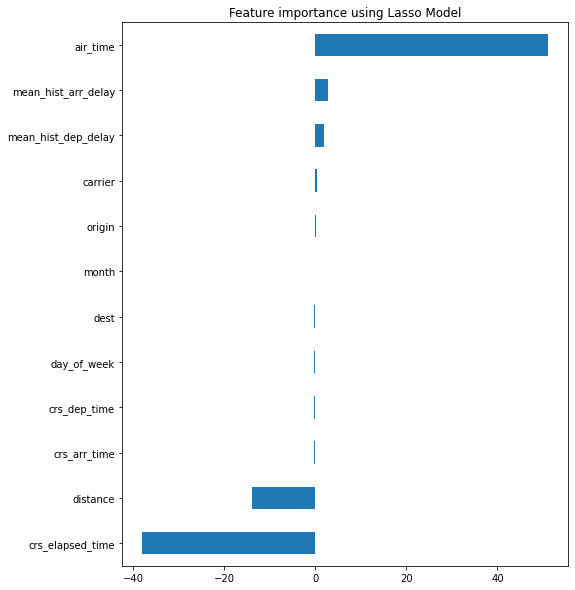

In [20]:
reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

import matplotlib.pyplot as plt
import matplotlib
imp_coef = coef.sort_values()

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Splitting of data

In [21]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Lasso Regression

In [22]:
reg = LassoCV()
reg.fit(X, y)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_test_lasso= model_lasso.predict(X_test)
print('RSME: ',np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('R2: ',r2_score(y_test, pred_test_lasso))

RSME:  27.161233854334615
R2:  0.07935484373024371


# Ridge Regression

In [23]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_test_rr= rr.predict(X_test)
print('RSME: ',np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('R2: ',r2_score(y_test, pred_test_rr))

RSME:  27.160036154492293
R2:  0.07943603534716948


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
y_pred_RF = rf.predict(X_test)
from sklearn import metrics
print('R2 score:',r2_score(y_test, y_pred_RF))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))

# XGBoost

In [24]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 15, alpha = 10, n_estimators = 200)
xg_reg.fit(X_test,y_test)
y_pred_xgb = xg_reg.predict(X_test)
print('Model RMSE is: ',np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print('Model R2 Score is: ',r2_score(y_test,y_pred_xgb))

Model RMSE is:  9.9248251138801
Model R2 Score is:  0.8770753420286003


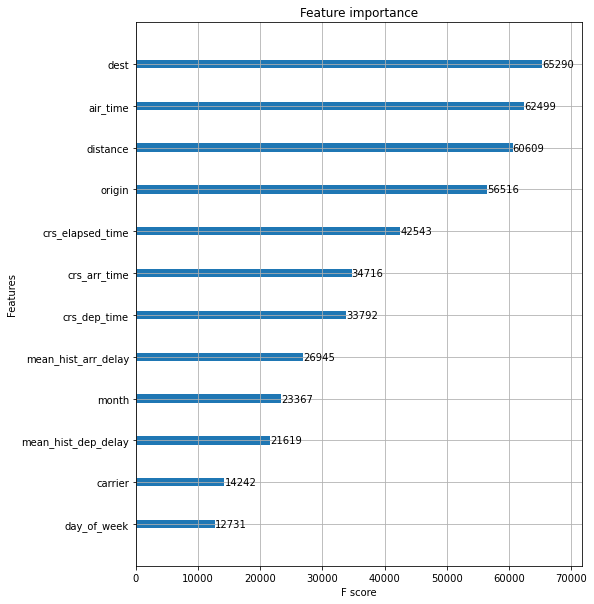

In [25]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

## Predict on January 2020 Flights_test dataset
Files can be found in:
data/test_eval.csv

In [26]:
## Import scaled test dataset (see: 5_feature_selection_test)
test_eval = pd.read_csv('data/flights_model.csv')

In [30]:
test_eval.head()
test_eval = test_eval.drop('arr_delay',axis=1)

In [29]:
model = XGBRegressor()

NameError: name 'XGBRegressor' is not defined

In [31]:
pred_test = xg_reg.predict(test_eval)

In [32]:
pd.DataFrame(pred_test).to_csv('data/pred_test.csv')

## Evaluate on the test data and prepare submission file

In [33]:
df = pd.read_csv("data/flights_test.csv")
df_submission = df.copy()
df_submission = df_submission[["fl_date","mkt_unique_carrier","mkt_carrier_fl_num", "origin","dest"]]
df_submission.sample(5)

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest
9669,2020-01-01,UA,3573,SAV,EWR
461072,2020-01-22,WN,974,HOU,MCO
297618,2020-01-14,F9,2307,PHL,BNA
618551,2020-01-30,F9,2935,BDL,MIA
228953,2020-01-11,AA,5779,YUM,PHX


In [34]:
y = pd.read_csv('data/pred_test.csv')

In [35]:
y_pred = y["0"].values

In [36]:
y_predicted = pd.DataFrame(data = y_pred,
                    columns = ["predicted_delay"])

In [37]:
final_pred = df_submission.merge(y_predicted, right_index = True, left_index = True)
final_pred.head()

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,predicted_delay
0,2020-01-01,WN,5888,ONT,SFO,-10.099297
1,2020-01-01,WN,6276,ONT,SFO,14.517684
2,2020-01-01,WN,4598,ONT,SJC,7.008315
3,2020-01-01,WN,4761,ONT,SJC,10.586285
4,2020-01-01,WN,5162,ONT,SJC,-10.931800


In [38]:
final_pred.to_csv("submission.csv", index=False)

In [39]:
final_pred

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,predicted_delay
0,2020-01-01,WN,5888,ONT,SFO,-10.099297
1,2020-01-01,WN,6276,ONT,SFO,14.517684
2,2020-01-01,WN,4598,ONT,SJC,7.008315
3,2020-01-01,WN,4761,ONT,SJC,10.586285
4,2020-01-01,WN,5162,ONT,SJC,-10.931800
...,...,...,...,...,...,...
192718,2020-01-09,UA,5772,DEN,BFL,-8.543220
192719,2020-01-09,UA,5773,SBN,ORD,8.529156
192720,2020-01-09,UA,5774,DEN,RDM,7.643732
192721,2020-01-09,UA,5775,STL,SFO,3.629389
